<a href="https://colab.research.google.com/github/shinobu9/econometrica/blob/main/sem_3_22_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

from scipy import signal

import statsmodels.tsa as tsa
import statsmodels.stats as stat
import statsmodels.api as sm

!pip install pandas_market_calendars
import pandas_market_calendars as mcal
from datetime import datetime
import matplotlib.dates as mdates

from matplotlib import pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 KB 6.9 MB/s eta 0:00:00


## Задача 6 Процессы скользящего среднего (MA) 

Сгенерируем реализации процессов MA(1) с b1= 0.8 и c b1= – 0.8.

In [ ]:
# 1* y_t = 1 * eps_t + b_1 * eps_t-1
ar = np.array([1])
ma1 = np.array([1, 0.8])
ma2 = np.array([1, -0.8])   

ma_1_1 = sm.tsa.ArmaProcess(ar, ma1).generate_sample(nsample = 200)
ma_1_2 = sm.tsa.ArmaProcess(ar, ma2).generate_sample(nsample = 200)

In [ ]:
lags_1 = sm.tsa.add_lag(ma_1_1, lags = 2)
lags_2 = sm.tsa.add_lag(ma_1_2, lags = 2)

Построим диаграммы рассеяния для лагов первого и второго порядков.

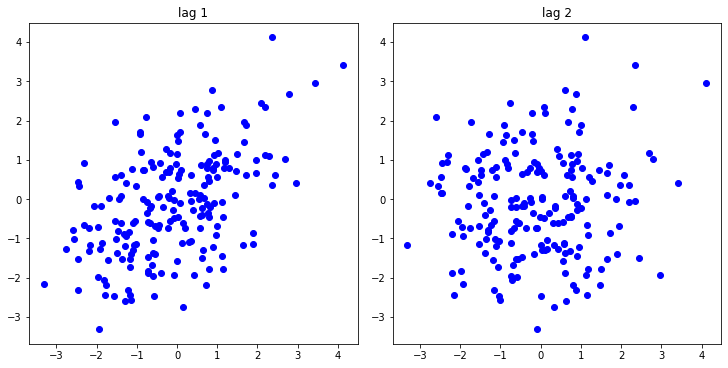

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), constrained_layout=True)

ax1.set(title='lag 1')
ax1.plot(lags_1[:, 0], lags_1[:, 1],'bo')

ax2.set(title='lag 2')
ax2.plot(lags_1[:, 0], lags_1[:, 2],'bo')

plt.show()

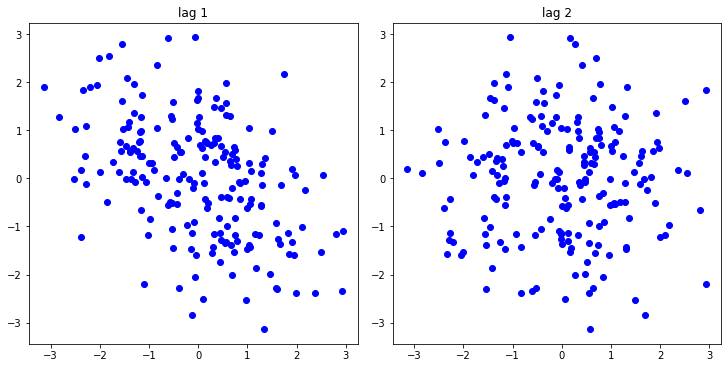

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), constrained_layout=True)

ax1.set(title='lag 1')
ax1.plot(lags_2[:, 0], lags_2[:, 1],'bo')

ax2.set(title='lag 2')
ax2.plot(lags_2[:, 0], lags_2[:, 2],'bo')

plt.show()

Построим теоретические ACF для указанных моделей.


In [ ]:
print(tsa.arima_process.arma_acf(ar, ma1, 5))
print(tsa.arima_process.arma_acf(ar, ma2, 5))

Построим эмпирические ACF, гистограммы и проведем проверку на нормальность.

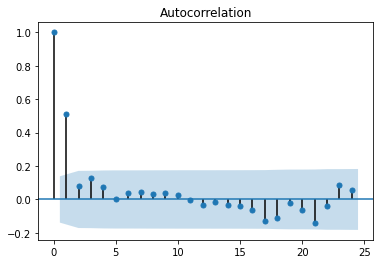

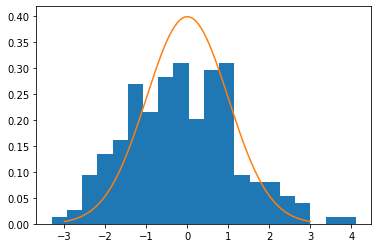

Jarque_beraResult(statistic=1.8909277833544922, pvalue=0.3884993074982749)


In [ ]:
sm.graphics.tsa.plot_acf(ma_1_1)
plt.show()

plt.hist(ma_1_1, bins = 20, density = True)

x = np.linspace(-3, 3, 200)
plt.plot(x, stats.norm.pdf(x), label = 'Normal dist')
plt.show()

print(stats.jarque_bera(ma_1_1))

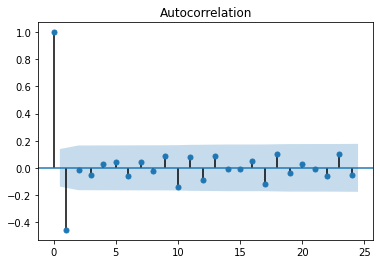

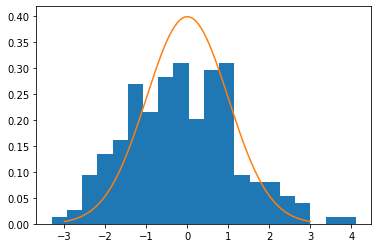

Jarque_beraResult(statistic=1.5188180112108642, pvalue=0.4679428969348407)


In [ ]:
sm.graphics.tsa.plot_acf(ma_1_2)
plt.show()

plt.hist(ma_1_1, bins = 20, density = True)

x = np.linspace(-3, 3, 200)
plt.plot(x, stats.norm.pdf(x), label = 'Normal dist')
plt.show()

print(stats.jarque_bera(ma_1_2))

Построим теоретические спектральные плотности рассмотренных процессов.
Сопоставим теоретические спектральные плотности с поведением реализаций.

In [ ]:
def spdens_ma1(lam, b_1, sig):
    res = ((1 + b_1**2 + 2 * b_1 * np.cos(lam)) *sig**2)/(2 * np.pi)
    return res

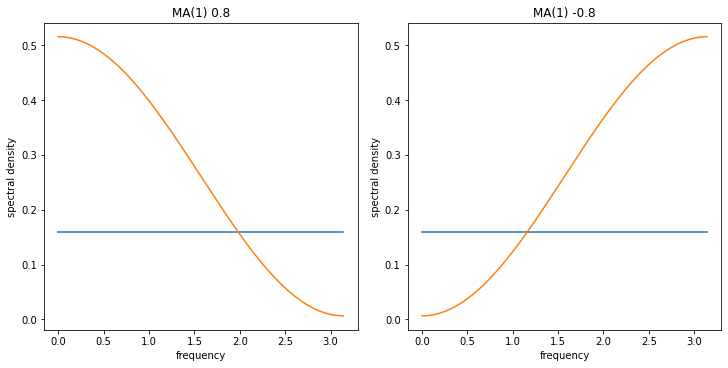

In [ ]:
lam = np.arange(0, np.pi, 0.01)
psd_1 = spdens_ma1(lam, 0.8, 1)
psd_2 = spdens_ma1(lam, -0.8, 1)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), constrained_layout=True)

ax1.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
ax1.plot(lam, psd_1)
ax1.set(title = 'MA(1) 0.8', xlabel = 'frequency', ylabel = 'spectral density' )

ax2.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
ax2.plot(lam, psd_2)
ax2.set(title = 'MA(1) -0.8', xlabel = 'frequency', ylabel = 'spectral density' )

plt.show()

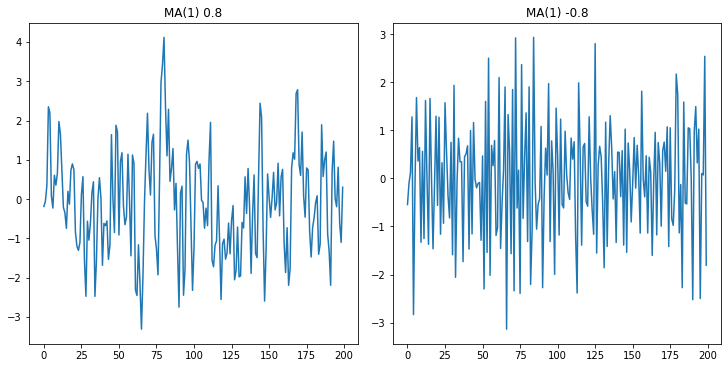

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), constrained_layout=True)

ax1.set(title='MA(1) 0.8')
ax1.plot(ma_1_1)

ax2.set(title='MA(1) -0.8')
ax2.plot(ma_1_2)

plt.show()

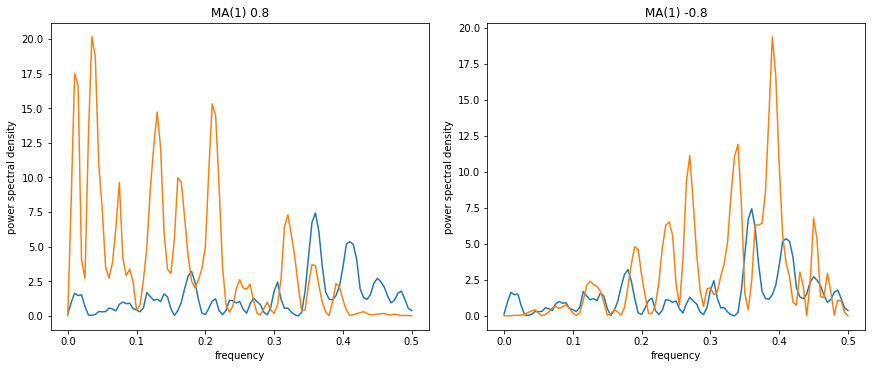

In [ ]:
wn = np.random.standard_normal(200)


freqs_0, psd_0 = signal.periodogram(wn, window = 'flattop')
freqs_1, psd_1 = signal.periodogram(ma_1_1, window = 'flattop')
freqs_2, psd_2 = signal.periodogram(ma_1_2, window = 'flattop')
 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 5), constrained_layout=True)

ax1.plot(freqs_0, psd_0, label = 'white noise gen')
ax1.plot(freqs_1, psd_1)
ax1.set(title = 'MA(1) 0.8', xlabel = 'frequency', ylabel = 'power spectral density' )

ax2.plot(freqs_0, psd_0, label = 'white noise gen')
ax2.plot(freqs_2, psd_2)
ax2.set(title = 'MA(1) -0.8', xlabel = 'frequency', ylabel = 'power spectral density' )

plt.show()

Построим спектральную плотность процесса MA(2) c b1= 0.8, b2= -0.3.

In [ ]:
def spdens_ma2(lam, b_1, b_2, sig):
    res = (1 + b_1**2 + b_2**2 + 2*(b_1 + b_1 * b_2) * np.cos(lam) + 2 * b_2 * np.cos(2 * lam)) * (sig**2)/(2 * np.pi)
    return res

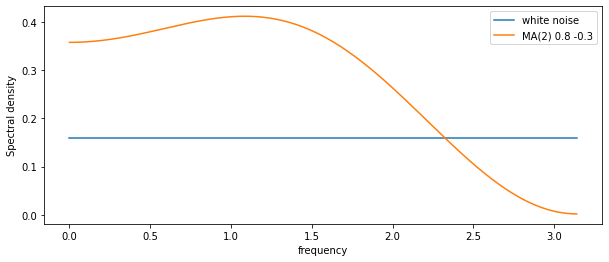

In [ ]:
lam = np.arange(0, np.pi, 0.01)
psd_1 = spdens_ma2(lam, 0.8, -0.3, 1)

plt.figure(figsize=(10, 4))
plt.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
plt.plot(lam, psd_1, label = 'MA(2) 0.8 -0.3')


plt.ylabel('Spectral density')
plt.xlabel('frequency')
plt.legend()
plt.show()

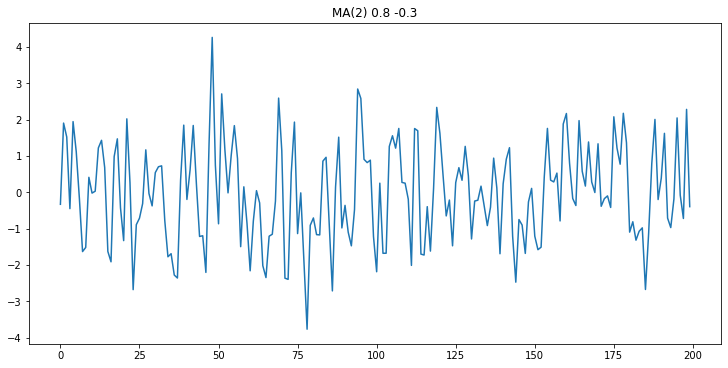

In [ ]:
ar = np.array([1])  
ma = np.array([1, 0.8, -0.3])

ma_2 = sm.tsa.ArmaProcess(ar, ma).generate_sample(nsample = 200)

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.set(title='MA(2) 0.8 -0.3')
ax.plot(ma_2)

plt.show()

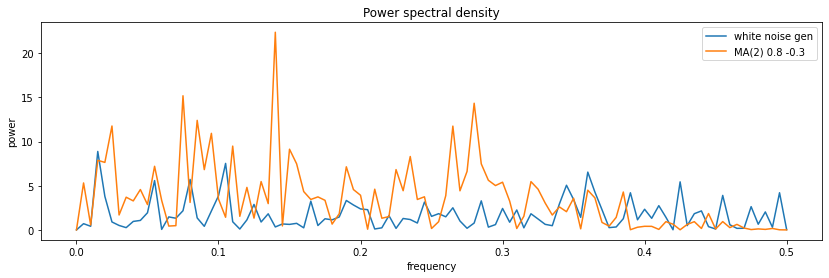

In [ ]:

freqs_0, psd_0 = signal.periodogram(wn)
freqs_1, psd_1 = signal.periodogram(ma_2)

plt.figure(figsize=(14, 4))
plt.plot(freqs_0, psd_0, label = 'white noise gen')
plt.plot(freqs_1, psd_1, label = 'MA(2) 0.8 -0.3')

plt.title('Power spectral density')
plt.xlabel('frequency')
plt.ylabel('power')
plt.legend()
plt.show()

## Задача 7  Процессы авторегрессии (AR)

Сгенерируем реализацию процесса AR(1) с a1=0.8 и нулевым математическим ожиданием.

Сгенерируем реализацию процесса AR(1) с a1= -0.8.
Сравним реализаций рядов с a1=0.8 и a1= -0.8.

In [ ]:
# y_t = a_1 * y_t-1 + eps_t -- вы так привыкли
# (1 - a_1)y_t = 1 * eps_t
ar_1 = np.array([1, -0.8])
ar_2 = np.array([1, 0.8])

ma = np.array([1])

ar_1_1 = sm.tsa.ArmaProcess(ar_1, ma).generate_sample(nsample = 200)
ar_1_2 = sm.tsa.ArmaProcess(ar_2, ma).generate_sample(nsample = 200)

#ar_1_3 = sm.tsa.ArmaProcess(ar_2, ma).generate_sample(nsample = 200, distrvs = np.random.normal(10, 1, 200))

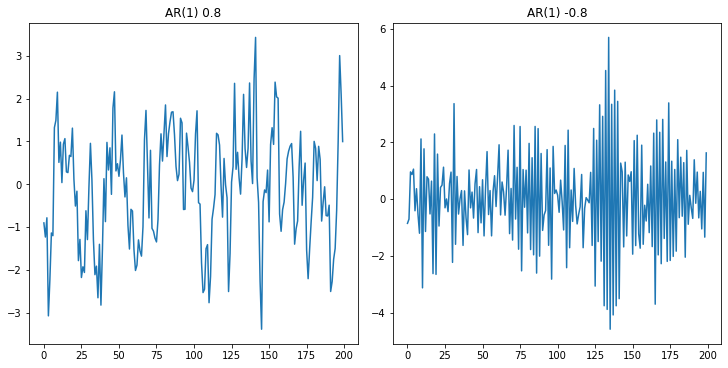

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), constrained_layout=True)

ax1.set(title='AR(1) 0.8')
ax1.plot(ar_1_1)

ax2.set(title='AR(1) -0.8')
ax2.plot(ar_1_2)

plt.show()

Сгенерируем и сравним реализации процессов AR(1) с a1=0.4 и a1= -0.4

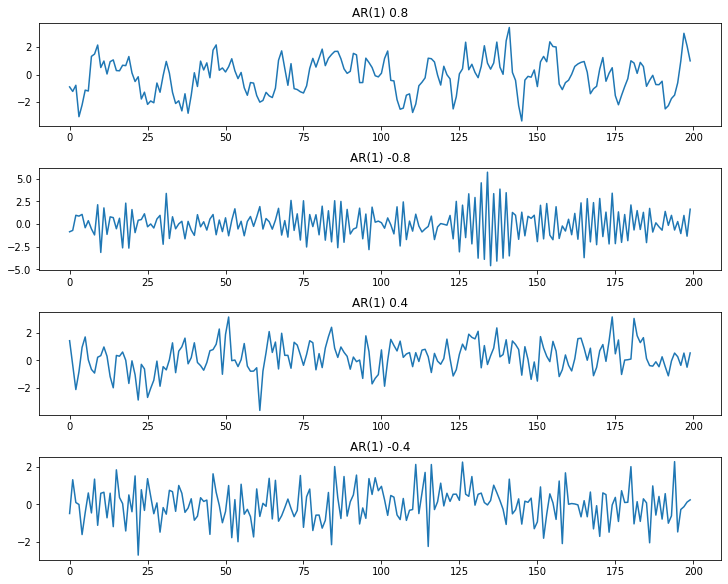

In [ ]:
ar_1 = np.array([1, -0.4])
ar_2 = np.array([1, 0.4])

ma = np.array([1])

ar_1_3 = sm.tsa.ArmaProcess(ar_1, ma).generate_sample(nsample = 200)
ar_1_4 = sm.tsa.ArmaProcess(ar_2, ma).generate_sample(nsample = 200)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize=(10, 8), constrained_layout=True)

ax1.set(title='AR(1) 0.8')
ax1.plot(ar_1_1)

ax2.set(title='AR(1) -0.8')
ax2.plot(ar_1_2)

ax3.set(title='AR(1) 0.4')
ax3.plot(ar_1_3)

ax4.set(title='AR(1) -0.4')
ax4.plot(ar_1_4)

plt.show()

Для рассмотренных случаев построим спектральную плотность процесса AR(1) и рассмотрим соответствие спектра и реализаций процесса AR(1)

In [ ]:
def spdens_ar1(lam, a_1, sig ):
    res = ((sig**2)/(2 * np.pi))/(1 + a_1**2 - 2 * a_1 * np.cos(lam))
    return res

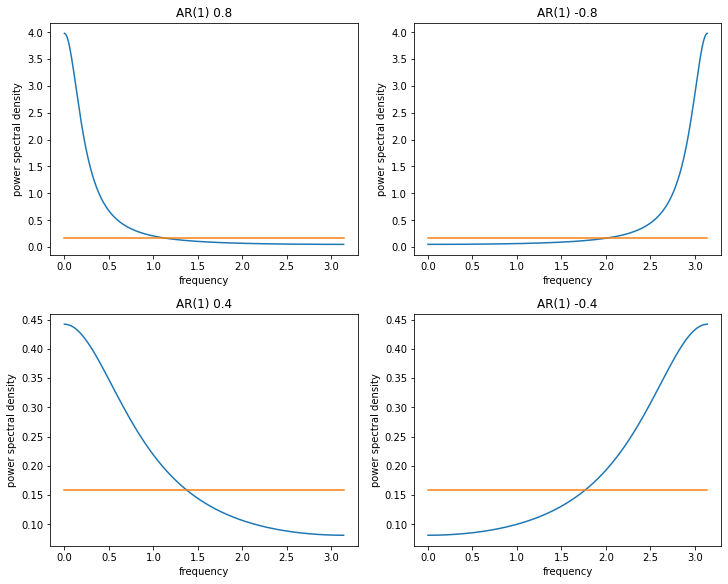

In [ ]:
lam = np.arange(0, np.pi, 0.01)
psd_1 = spdens_ar1(lam, 0.8, 1)
psd_2 = spdens_ar1(lam, -0.8, 1)
psd_3 = spdens_ar1(lam, 0.4, 1)
psd_4 = spdens_ar1(lam, -0.4, 1)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 8), constrained_layout=True)

ax1.plot(lam, psd_1)
ax1.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
ax1.set(title = 'AR(1) 0.8', xlabel = 'frequency', ylabel = 'power spectral density' )

ax2.plot(lam, psd_2)
ax2.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
ax2.set(title = 'AR(1) -0.8', xlabel = 'frequency', ylabel = 'power spectral density' )

ax3.plot(lam, psd_3)
ax3.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
ax3.set(title = 'AR(1) 0.4', xlabel = 'frequency', ylabel = 'power spectral density' )

ax4.plot(lam, psd_4)
ax4.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
ax4.set(title = 'AR(1) -0.4', xlabel = 'frequency', ylabel = 'power spectral density' )

plt.show()

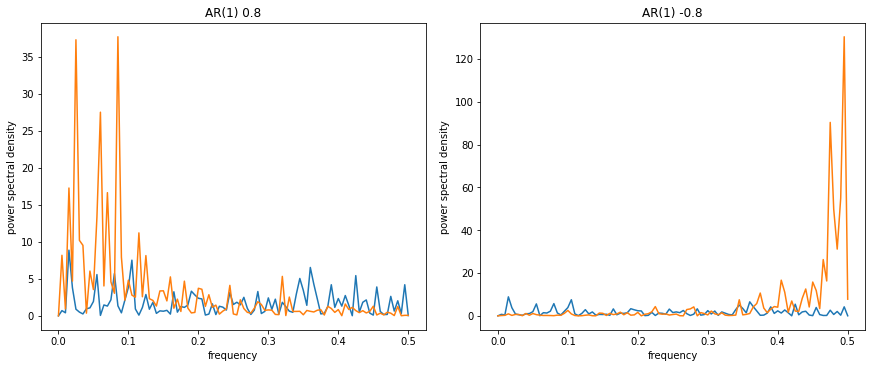

In [ ]:
freqs_0, psd_0 = signal.periodogram(wn)
freqs_1, psd_1 = signal.periodogram(ar_1_1)
freqs_2, psd_2 = signal.periodogram(ar_1_2)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 5), constrained_layout=True)

ax1.plot(freqs_0, psd_0, label = 'white noise gen')
ax1.plot(freqs_1, psd_1)
ax1.set(title = 'AR(1) 0.8', xlabel = 'frequency', ylabel = 'power spectral density' )

ax2.plot(freqs_0, psd_0, label = 'white noise gen')
ax2.plot(freqs_2, psd_2)
ax2.set(title = 'AR(1) -0.8', xlabel = 'frequency', ylabel = 'power spectral density' )

plt.show()

Построим спектральную плотность процесса AR(2) с a1=0.7 и a2 -0.5.

In [ ]:
def spdens_ar2(lam, a_1, a_2, sig ):
    res = ((sig**2)/(2*np.pi))/(1 + a_1**2 + a_2**2 - 2 * a_1 * (1 - a_2) * np.cos(lam)-2 * a_2 * np.cos(2 * lam))
    return res

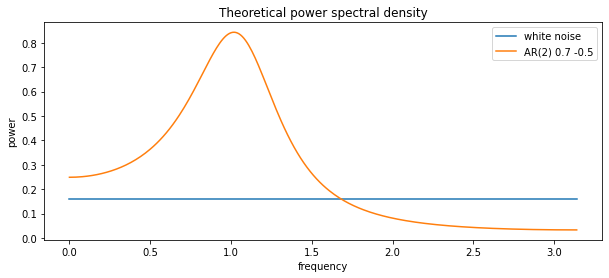

In [ ]:
lam = np.arange(0, np.pi, 0.01)
psd_1 = spdens_ar2(lam, 0.7, -0.5, 1)

plt.figure(figsize=(10, 4))
plt.plot(lam, np.ones(len(psd_1))/(2*np.pi), label = 'white noise')
plt.plot(lam, psd_1, label = 'AR(2) 0.7 -0.5')


plt.title('Theoretical power spectral density')
plt.xlabel('frequency')
plt.ylabel('power')
plt.legend()
plt.show()

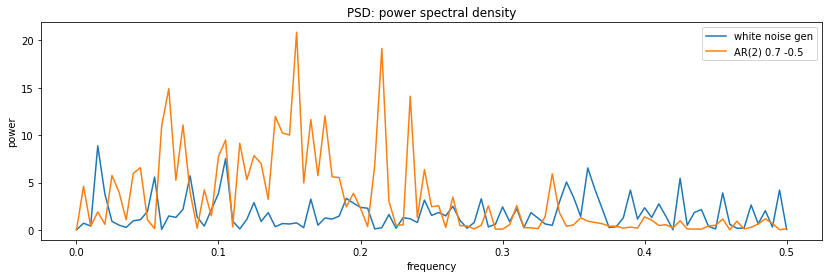

In [ ]:
ar = np.array([1, -0.7, 0.5])
ma = np.array([1])

ar_2 = sm.tsa.ArmaProcess(ar, ma).generate_sample(nsample = 200)

freqs_0, psd_0 = signal.periodogram(wn)
freqs_1, psd_1 = signal.periodogram(ar_2)

plt.figure(figsize=(14, 4))
plt.plot(freqs_0, psd_0, label = 'white noise gen')
plt.plot(freqs_1, psd_1, label = 'AR(2) 0.7 -0.5')

plt.title('PSD: power spectral density')
plt.xlabel('frequency')
plt.ylabel('power')
plt.legend()
plt.show()